In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
#Generating a function that subsets the data for a single 'control' condition
def subset_ref_comp(df, strain):
    dat = df.loc[(df['Strain'] == strain)&(df['control'] == 'DMSO')]
    dat =dat.sort_values('difference')
    #Two compounds accidently made it into the mutant screen that should have been excluded due to a sorting error
    dat = dat.loc[(dat['test'] != '2-Nonylquinolin-4(1H)-one') & (dat['test'] != 'Rosmarinic acid')& (dat['test'] != 'Safranal')]
    dat = dat.reset_index(drop=True)
    return dat


In [3]:
N2dat = pd.read_csv('C:/Users/Emily/Documents/S1/inner3.csv', index_col=0)
N2dat['Strain'] = 'N2'
N2DMSO = subset_ref_comp(N2dat, 'N2')
comp_ord= N2DMSO['test']

In [4]:
data = pd.read_csv('/Users/Emily/Desktop/ReviewerResponses/dd_allLines.csv', index_col=0)

In [5]:
print(len(data))

42


In [6]:
data['test'] = pd.Categorical(data['test'], ordered=True, categories=comp_ord)
reordered = data.sort_values('test', ascending=False)
srtd = reordered.set_index('test')

In [7]:
strains = ['GN1077', 'CX10', 'PR678']


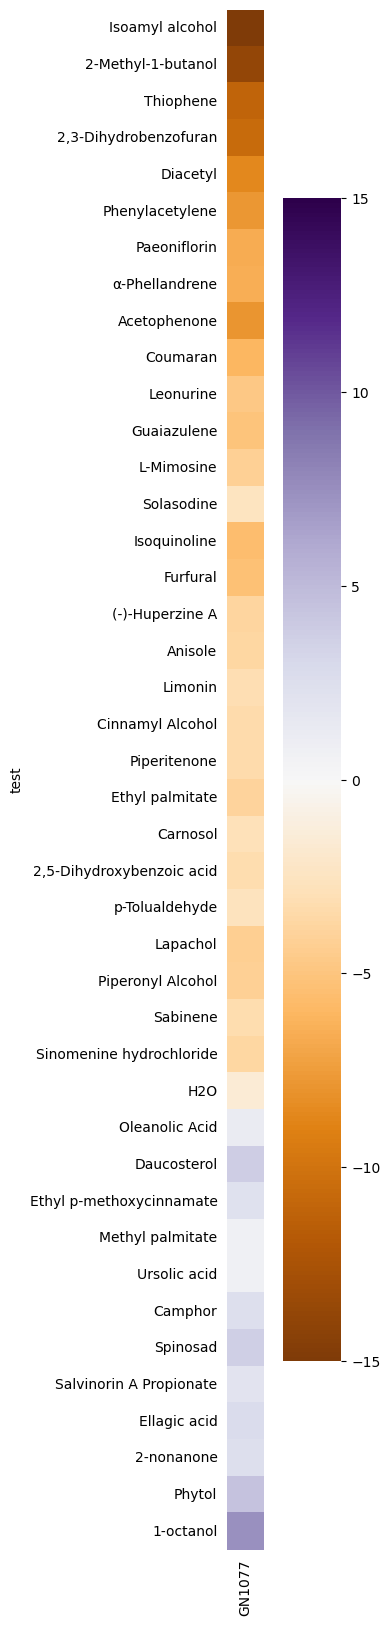

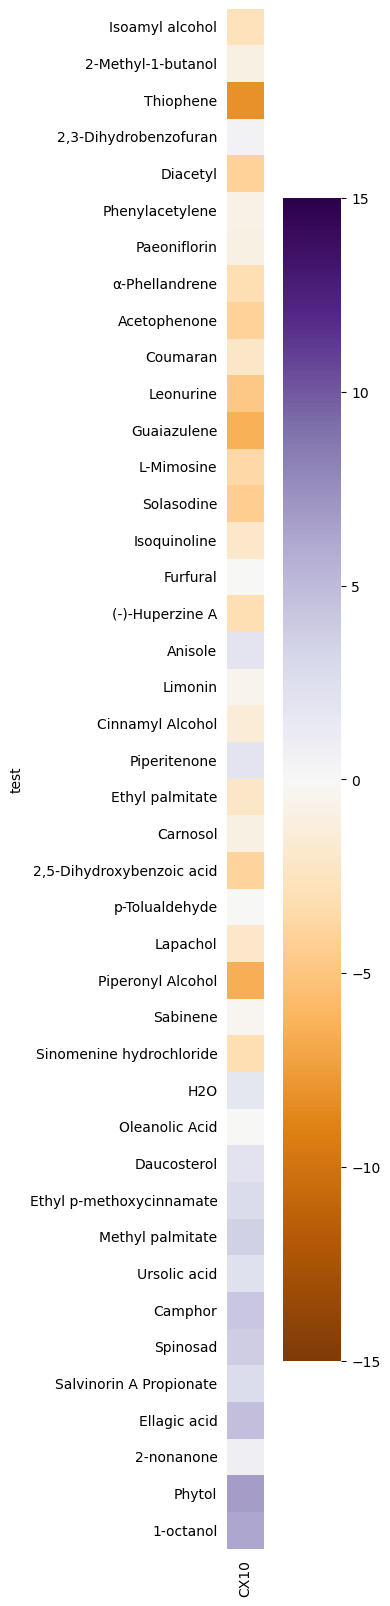

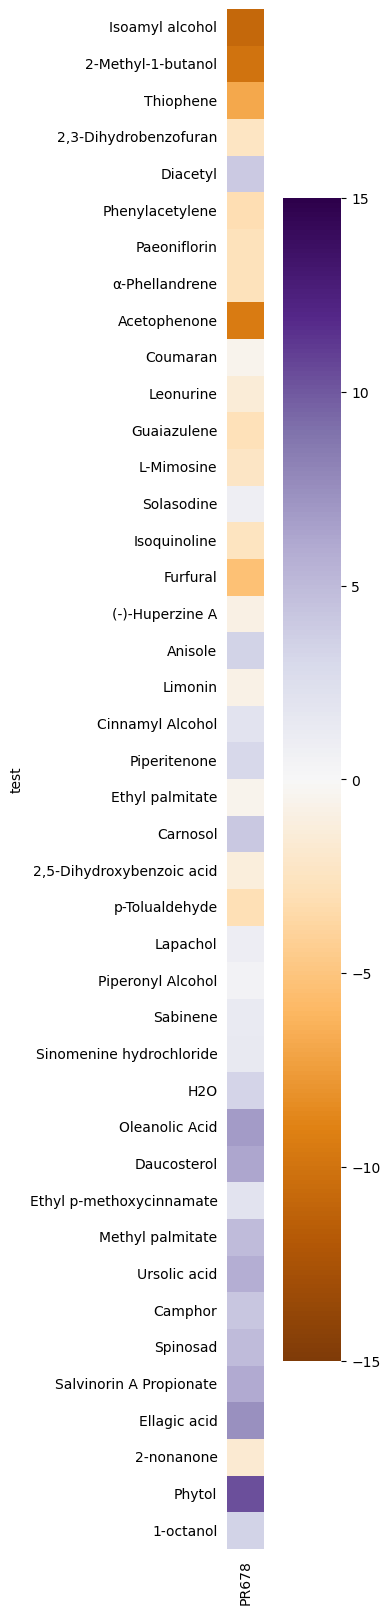

In [155]:
for s in strains:
    df = pd.DataFrame(srtd[s])
    fig, ax = plt.subplots(figsize=(5,20))
    sns.heatmap(df,  vmax=15, vmin=-15, center=0, cmap='PuOr', square=True)
    ax.tick_params(bottom=False, left=False)
    plt.xticks(rotation=90)
    #plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('/Users/Emily/Desktop/ReviewerResponses/hmap_'+s+'.svg')
    plt.show()

In [168]:
cols = ['bca_high', 'bca_low', 'difference', 'test', 'Strain', 'vs']
vn2 = pd.read_csv('/Users/Emily/Desktop/ReviewerResponses/mutVn2_dd.csv', index_col=0)
vgn = pd.read_csv('/Users/Emily/Desktop/ReviewerResponses/singleGN_dd.csv', index_col=0)
vsin =  pd.read_csv('/Users/Emily/Desktop/ReviewerResponses/ddSingles.csv')

In [169]:
all_dat= vn2.append(vgn)
#all_dat['absval'] = all_dat['difference'].abs()
df1 = pd.DataFrame()
df1['vals'] = all_dat['difference'].abs()
df1['vs'] = all_dat['vs']
df1['Strain'] = all_dat['Strain']

df2 = pd.DataFrame()
df2['vals'] = all_dat['difference']
df2['vs'] = all_dat['vs']
df2['Strain'] = all_dat['Strain']


In [170]:
df1gn = df1.loc[df1['vs']=='GN1077']
df1n2= df1.loc[df1['vs']=='N2']

df2gn = df2.loc[df2['vs']=='GN1077']
df2n2= df2.loc[df2['vs']=='N2']

C:\Users\Emily\miniconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Emily\miniconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Emily\miniconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

<AxesSubplot:xlabel='vals', ylabel='Strain'>

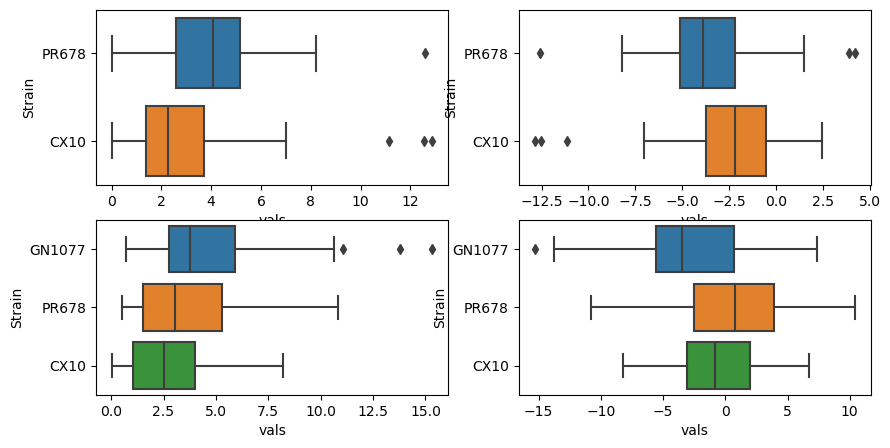

In [171]:

fig, axes = plt.subplots(2,2, figsize=(10,5))

sns.boxplot(df1gn.vals, df1gn.Strain, ax=axes[0,0])
sns.boxplot(df1n2.vals, df1n2.Strain, ax=axes[1,0])

sns.boxplot(df2gn.vals, df2gn.Strain, ax=axes[0,1])
sns.boxplot(df2n2.vals, df2n2.Strain, ax=axes[1,1])




In [172]:
print(vn2.difference.median())
print(vn2.difference.min())
print(vn2.difference.max())

-1.3115447494999999
-15.31831964
10.41081329


In [173]:

all_dat['difference'] = all_dat['difference'].abs()
sts = all_dat.copy().reset_index(drop=True)
sts.loc[sts['Strain'] == 'PR678']

,bca_high,bca_low,control,difference,test,Strain,vs
42,1.107636,-2.808568,DMSO,0.871415,(-)-Huperzine A,PR678,N2
43,5.433187,1.517247,DMSO,3.493226,1-octanol,PR678,N2
44,-0.344214,-4.525213,DMSO,2.403412,"2,3-Dihydrobenzofuran",PR678,N2
45,0.670392,-3.009967,DMSO,1.206039,"2,5-Dihydroxybenzoic acid",PR678,N2
46,-7.739386,-12.183687,DMSO,9.989616,2-Methyl-1-butanol,PR678,N2
...,...,...,...,...,...,...,...
163,0.307826,-2.824307,DMSO,1.270536,Spinosad,PR678,GN1077
164,-2.674238,-5.878298,DMSO,4.247001,Thiophene,PR678,GN1077
165,-3.432454,-6.774057,DMSO,5.117962,Ursolic acid,PR678,GN1077
166,1.777222,-1.160938,DMSO,0.321815,p-Tolualdehyde,PR678,GN1077


In [174]:
sts.Strain.unique()
sts.vs.unique()

array(['N2', 'GN1077'], dtype=object)

In [175]:
qt2 = sts['difference'].median()
h = sts.loc[sts['difference']>=qt2]
l = sts.loc[sts['difference']<qt2]
qt3 = h.difference.median()
qt1 = l.difference.median()
print(qt1, qt2, qt3)


1.814257242 3.2020910025 4.982910054


In [176]:
for index, row in sts.iterrows():
    if (row['difference'] < qt1):
        sts.loc[index, 'strength'] = int(0)
    elif (row['difference']> qt1) & (row['difference']<=qt2):
        sts.loc[index, 'strength'] = int(1)
    elif (row['difference']> qt2) & (row['difference']<=qt3):
        sts.loc[index, 'strength'] = int(2)
    elif (row['difference'] > qt3):
        sts.loc[index, 'strength'] = int(3)
sts.head()

,bca_high,bca_low,control,difference,test,Strain,vs,strength
0,-1.985563,-5.646006,DMSO,3.812629,(-)-Huperzine A,GN1077,N2,2.0
1,9.104256,5.702700,DMSO,7.405581,1-octanol,GN1077,N2,3.0
2,-8.728370,-12.331215,DMSO,10.619060,"2,3-Dihydrobenzofuran",GN1077,N2,3.0
3,-1.469283,-4.863130,DMSO,3.220689,"2,5-Dihydroxybenzoic acid",GN1077,N2,2.0
4,-11.620576,-15.917539,DMSO,13.802287,2-Methyl-1-butanol,GN1077,N2,3.0


In [177]:
#sts.to_csv('/Users/Emily/Desktop/test.csv')

In [178]:
big_pr_n2 = sts.loc[(sts.strength>=2)& (sts.Strain=='PR678') & (sts.vs=='N2')]
sml_pr_gn = sts.loc[(sts.strength<2)&(sts.Strain=='PR678')& (sts.vs=='GN1077')]
pr_dep = big_pr_n2.merge(sml_pr_gn, on='test', how='inner')
pr_dep

,bca_high_x,bca_low_x,control_x,difference_x,test,Strain_x,vs_x,strength_x,bca_high_y,bca_low_y,control_y,difference_y,Strain_y,vs_y,strength_y
0,-7.467451,-11.458507,DMSO,9.393563,Acetophenone,PR678,N2,3.0,3.047179,-0.111032,DMSO,1.492482,PR678,GN1077,0.0
1,6.191521,2.323069,DMSO,4.267657,Camphor,PR678,N2,2.0,0.008540,-3.367016,DMSO,1.725395,PR678,GN1077,0.0
2,8.281170,4.114672,DMSO,6.238424,Daucosterol,PR678,N2,3.0,-0.675605,-4.257360,DMSO,2.486965,PR678,GN1077,1.0
3,-3.387941,-7.416984,DMSO,5.378984,Furfural,PR678,N2,3.0,1.673924,-1.544983,DMSO,0.020029,PR678,GN1077,0.0
4,6.849777,3.095476,DMSO,4.988027,Spinosad,PR678,N2,3.0,0.307826,-2.824307,DMSO,1.270536,PR678,GN1077,0.0


In [179]:
big_cx_n2 = sts.loc[(sts.strength>=2)& (sts.Strain=='CX10') & (sts.vs=='N2')]
sml_cx_gn = sts.loc[(sts.strength<2)&(sts.Strain=='CX10')& (sts.vs=='GN1077')]
cx_dep = big_cx_n2.merge(sml_cx_gn, on='test', how='inner')
cx_dep

,bca_high_x,bca_low_x,control_x,difference_x,test,Strain_x,vs_x,strength_x,bca_high_y,bca_low_y,control_y,difference_y,Strain_y,vs_y,strength_y
0,8.333437,4.203025,DMSO,6.272903,1-octanol,CX10,N2,3.0,2.898219,-0.646104,DMSO,1.132678,CX10,GN1077,0.0
1,-1.903313,-6.129221,DMSO,3.982676,"2,5-Dihydroxybenzoic acid",CX10,N2,2.0,2.538996,-0.970270,DMSO,0.761987,CX10,GN1077,0.0
2,6.359081,2.279861,DMSO,4.324269,Camphor,CX10,N2,2.0,-0.041857,-3.641981,DMSO,1.782007,CX10,GN1077,0.0
3,6.759832,2.734867,DMSO,4.738386,Ellagic acid,CX10,N2,2.0,-0.270987,-3.698401,DMSO,1.992948,CX10,GN1077,1.0
4,-4.327354,-8.349345,DMSO,6.331798,Guaiazulene,CX10,N2,3.0,3.086366,-0.553665,DMSO,1.266658,CX10,GN1077,0.0
5,-1.428338,-5.719299,DMSO,3.597546,L-Mimosine,CX10,N2,2.0,1.232977,-2.436798,DMSO,0.543479,CX10,GN1077,0.0
6,-2.729981,-6.955029,DMSO,4.797061,Leonurine,CX10,N2,2.0,1.728564,-1.737876,DMSO,0.015783,CX10,GN1077,0.0
7,5.699451,1.487442,DMSO,3.565126,Methyl palmitate,CX10,N2,2.0,-1.064563,-4.685702,DMSO,2.830215,CX10,GN1077,1.0
8,9.073897,4.497570,DMSO,6.753860,Phytol,CX10,N2,3.0,-0.439430,-4.060083,DMSO,2.297888,CX10,GN1077,1.0
9,-4.569327,-8.682404,DMSO,6.562025,Piperonyl Alcohol,CX10,N2,3.0,4.304320,0.671379,DMSO,2.459503,CX10,GN1077,1.0


In [180]:
t4c = pr_dep['test']
# Compounnds where the CIs between CX10 and GN1077 are "the same"
# This implies that the N2 behavior was lost and is dependent on the osm-9 ion channel
o9c = cx_dep['test']
o9c

0                     1-octanol
1     2,5-Dihydroxybenzoic acid
2                       Camphor
3                  Ellagic acid
4                   Guaiazulene
5                    L-Mimosine
6                     Leonurine
7              Methyl palmitate
8                        Phytol
9             Piperonyl Alcohol
10                   Solasodine
11                     Spinosad
12                    Thiophene
Name: test, dtype: object

In [181]:
t4c

0    Acetophenone
1         Camphor
2     Daucosterol
3        Furfural
4        Spinosad
Name: test, dtype: object

In [182]:
valence = ['Acetophenone', 'Piperonyl Alcohol', 'Oleanolic Acid', 'Daucosterol', 'Methyl palmitate', 'Ursolic acid',
           'Spinosad', 'Salvinorin A Propionate', 'Ellagic acid', 'Phytol']

In [183]:
t4cc = [i for i in t4c if i not in valence]
o9cc = [i for i in o9c if i not in valence]

In [184]:
print(t4cc)
print(o9cc)

['Camphor', 'Furfural']
['1-octanol', '2,5-Dihydroxybenzoic acid', 'Camphor', 'Guaiazulene', 'L-Mimosine', 'Leonurine', 'Solasodine', 'Thiophene']


In [185]:
unwanted = {'Guaiazulene', 'L-Mimosine', 'Camphor'}
t4ccc = [e for e in t4cc if e not in unwanted]
o9ccc = [e for e in o9cc if e not in unwanted]
#t4cc.remove(['Camphor','L-Mimosine'])
#o9cc.remove('Camphor')

In [186]:
sub_cats = valence + t4ccc +o9ccc

In [187]:
otherc = [x for x in sts['test'].unique() if x not in sub_cats]
otherc

['(-)-Huperzine A',
 '2,3-Dihydrobenzofuran',
 '2-Methyl-1-butanol',
 '2-nonanone',
 'Anisole',
 'Camphor',
 'Carnosol',
 'Cinnamyl Alcohol',
 'Coumaran',
 'Diacetyl',
 'Ethyl p-methoxycinnamate',
 'Ethyl palmitate',
 'Guaiazulene',
 'H2O',
 'Isoamyl alcohol',
 'Isoquinoline',
 'L-Mimosine',
 'Lapachol',
 'Limonin',
 'Paeoniflorin',
 'Phenylacetylene',
 'Piperitenone',
 'Sabinene',
 'Sinomenine hydrochloride',
 'p-Tolualdehyde',
 'α-Phellandrene']

In [188]:
cats = [t4ccc, o9ccc, valence, otherc]
print(len(t4ccc)+len(o9ccc)+len(valence)+len(otherc))

42


In [189]:
data = pd.read_csv('/Users/Emily/Desktop/ReviewerResponses/alldds.csv', index_col=0)
data = data.drop('PR678vCX', axis=1)
print(len(data))

42


In [190]:
data_abs = data.copy()
cs=['GN1077vN2', 'CX10vN2', 'PR678vN2', 'CX10vGN', 'PR678vGN']
for col in cs:
    data_abs[col] = data_abs[col].abs()
data_abs.head()

,GN1077vN2,CX10vN2,PR678vN2,CX10vGN,PR678vGN,test
0,3.812629,3.095234,0.871415,0.717395,2.941214,(-)-Huperzine A
1,7.405581,6.272903,3.493226,1.132678,3.912354,1-octanol
2,10.619060,0.541383,2.403412,11.160443,8.215649,"2,3-Dihydrobenzofuran"
3,3.220689,3.982676,1.206039,0.761987,2.014649,"2,5-Dihydroxybenzoic acid"
4,13.802287,0.928199,9.989616,12.874088,3.812671,2-Methyl-1-butanol


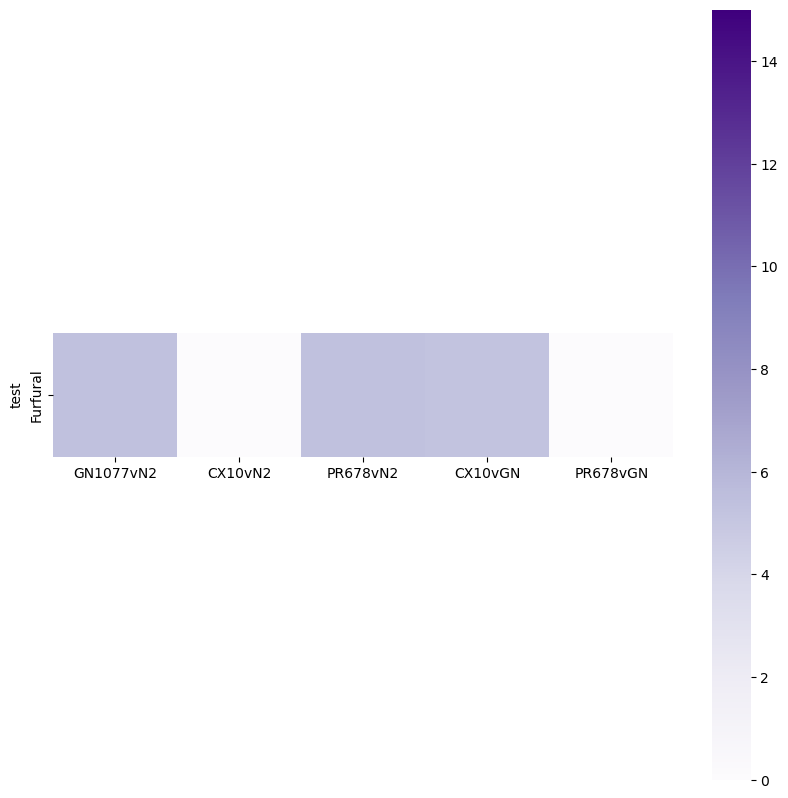

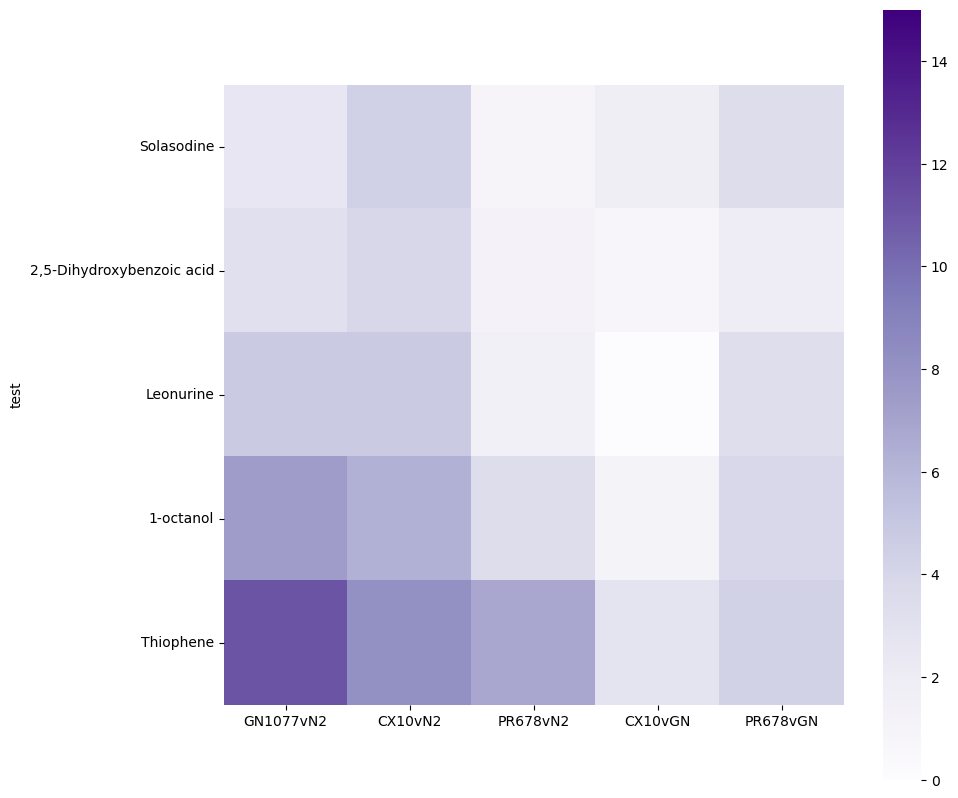

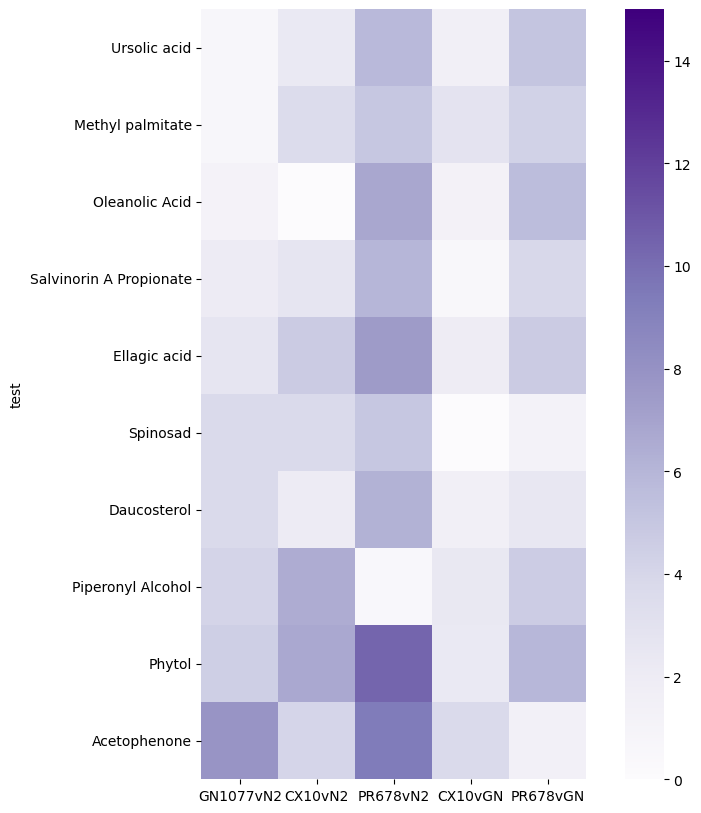

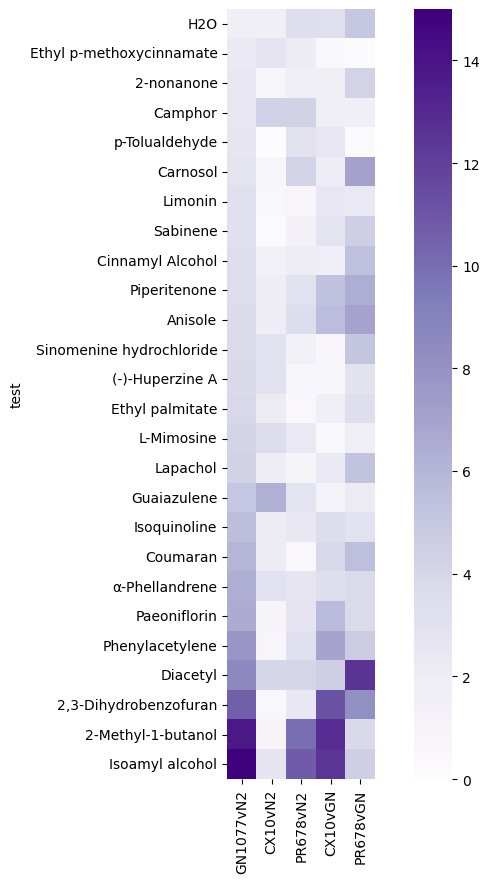

In [191]:
dpi=100
squaresize = 50 # pixels
i=1
for j in cats:

    d = data_abs[data_abs['test'].isin(j)]
    srt = d.sort_values(by='GN1077vN2')
    srtd = srt.set_index('test')
    srtd

    
    f, ax = plt.subplots(1, figsize=(10,10), dpi=dpi)
    #f.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax = sns.heatmap(srtd, vmax=15, vmin=0, center=7.5, cmap='Purples', square=True, ax=ax, cbar=True) 
    plt.savefig('/Users/Emily/Desktop/ReviewerResponses/png/hmap_cats_qts_cont' + str(i) + '.png', dpi=dpi, bbox_inches="tight")
    i= i + 1

NameError: name 'clr' is not defined

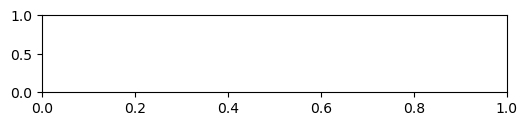

In [192]:
fig, ax = plt.subplots(figsize=(6, 1))

cmap = 'Purples'
norm = clr.Normalize(vmin=0, vmax=15)

cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label= 'Effect size', ticks=[0, qt1, qt2,qt3, 15])


plt.savefig('/Users/Emily/Desktop/NPScreen_figs/Fig7_colorbar.svg')

In [278]:
strength_gn = pd.DataFrame()
strength_gn['Test'] = data['test'] 

strength_n2 = pd.DataFrame()
strength_n2['Test'] = data['test']

In [279]:
vs = ['N2', 'GN1077']
for v in vs:
    for s in strains:
        cname = s+'_'+v
        if v =='N2':
            sub = sts.loc[(sts['Strain'] == s) & (sts['vs']==v)]['strength'].reset_index(drop=True)
            #sub = sub.reset_index()
            strength_n2[cname] = sub
        elif v =='GN1077':
            if cname == 'GN1077_GN1077':
                continue
            else:
                sub = sts.loc[(sts['Strain'] == s) & (sts['vs']==v)]['strength'].reset_index(drop=True)
                #sub = sub.reset_index()
                strength_gn[cname] = sub


In [280]:
cmp = ListedColormap(['#edf8fb', '#b3cde3', '#8c96c6', '#88419d'])

In [281]:
srt_gn = vn2.loc[vn2['Strain']=='GN1077'].sort_values(by='difference')
srt_gn_c = srt_gn['test']


In [294]:
sgn = strength_gn.set_index('Test').reindex(srt_gn_c)
sgn.reset_index(inplace=True)
sn2 = strength_n2.set_index('Test').reindex(srt_gn_c)
sn2.reset_index(inplace=True)

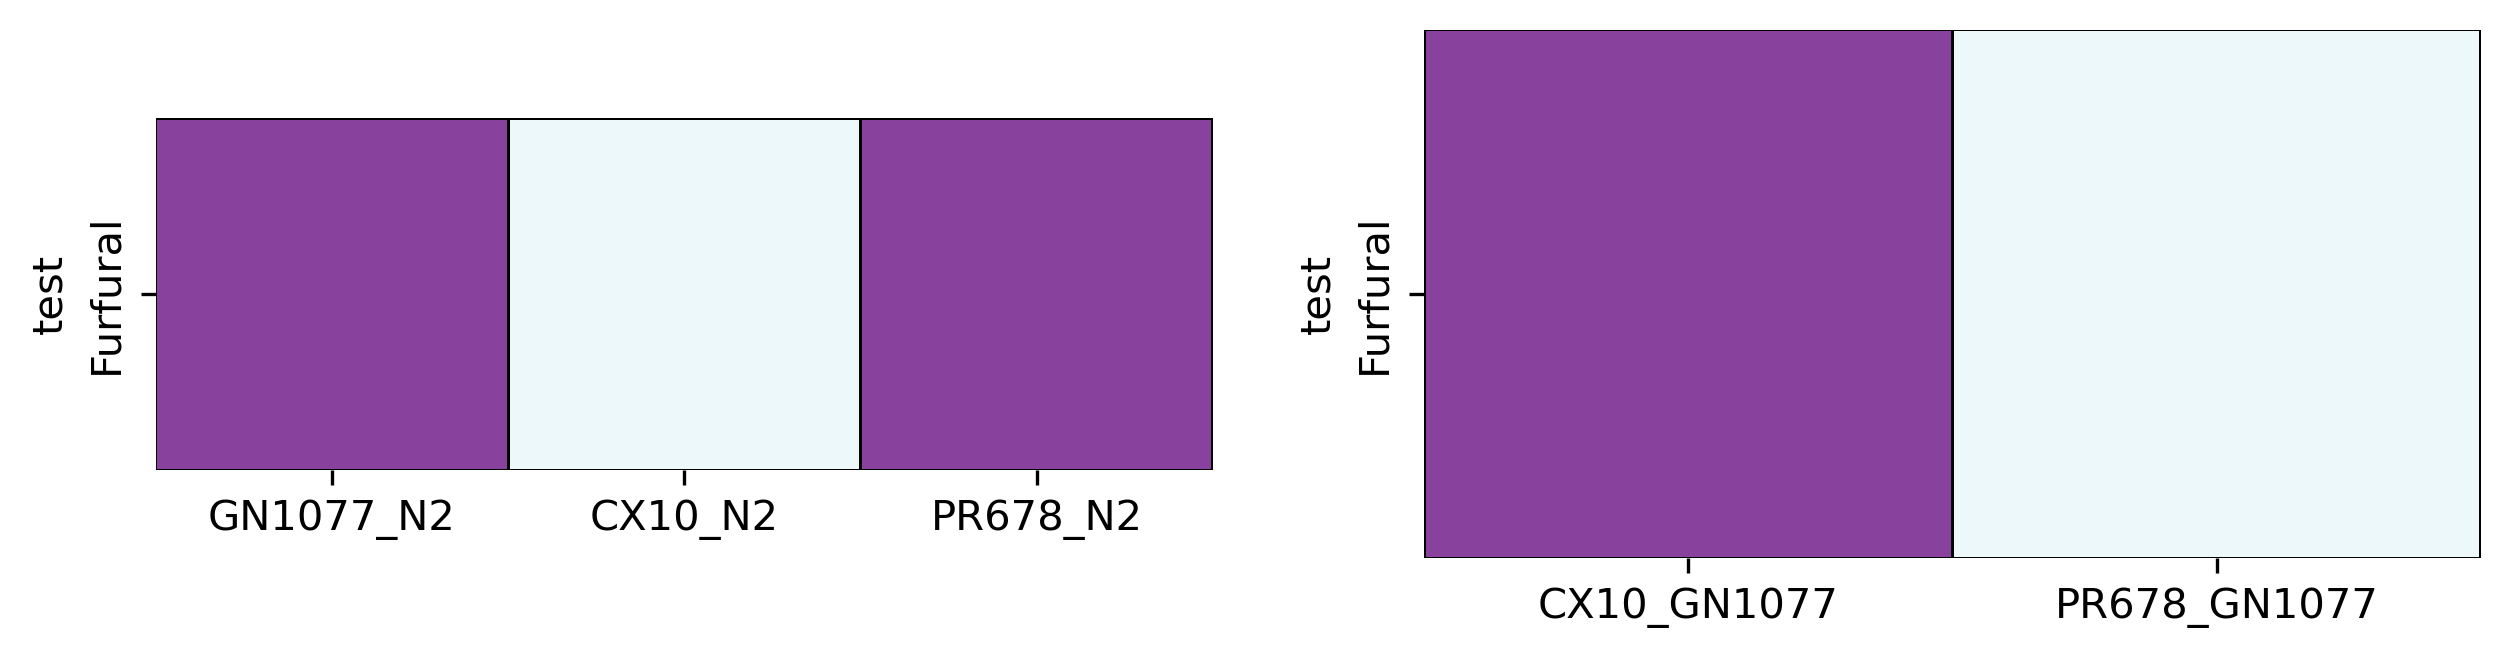

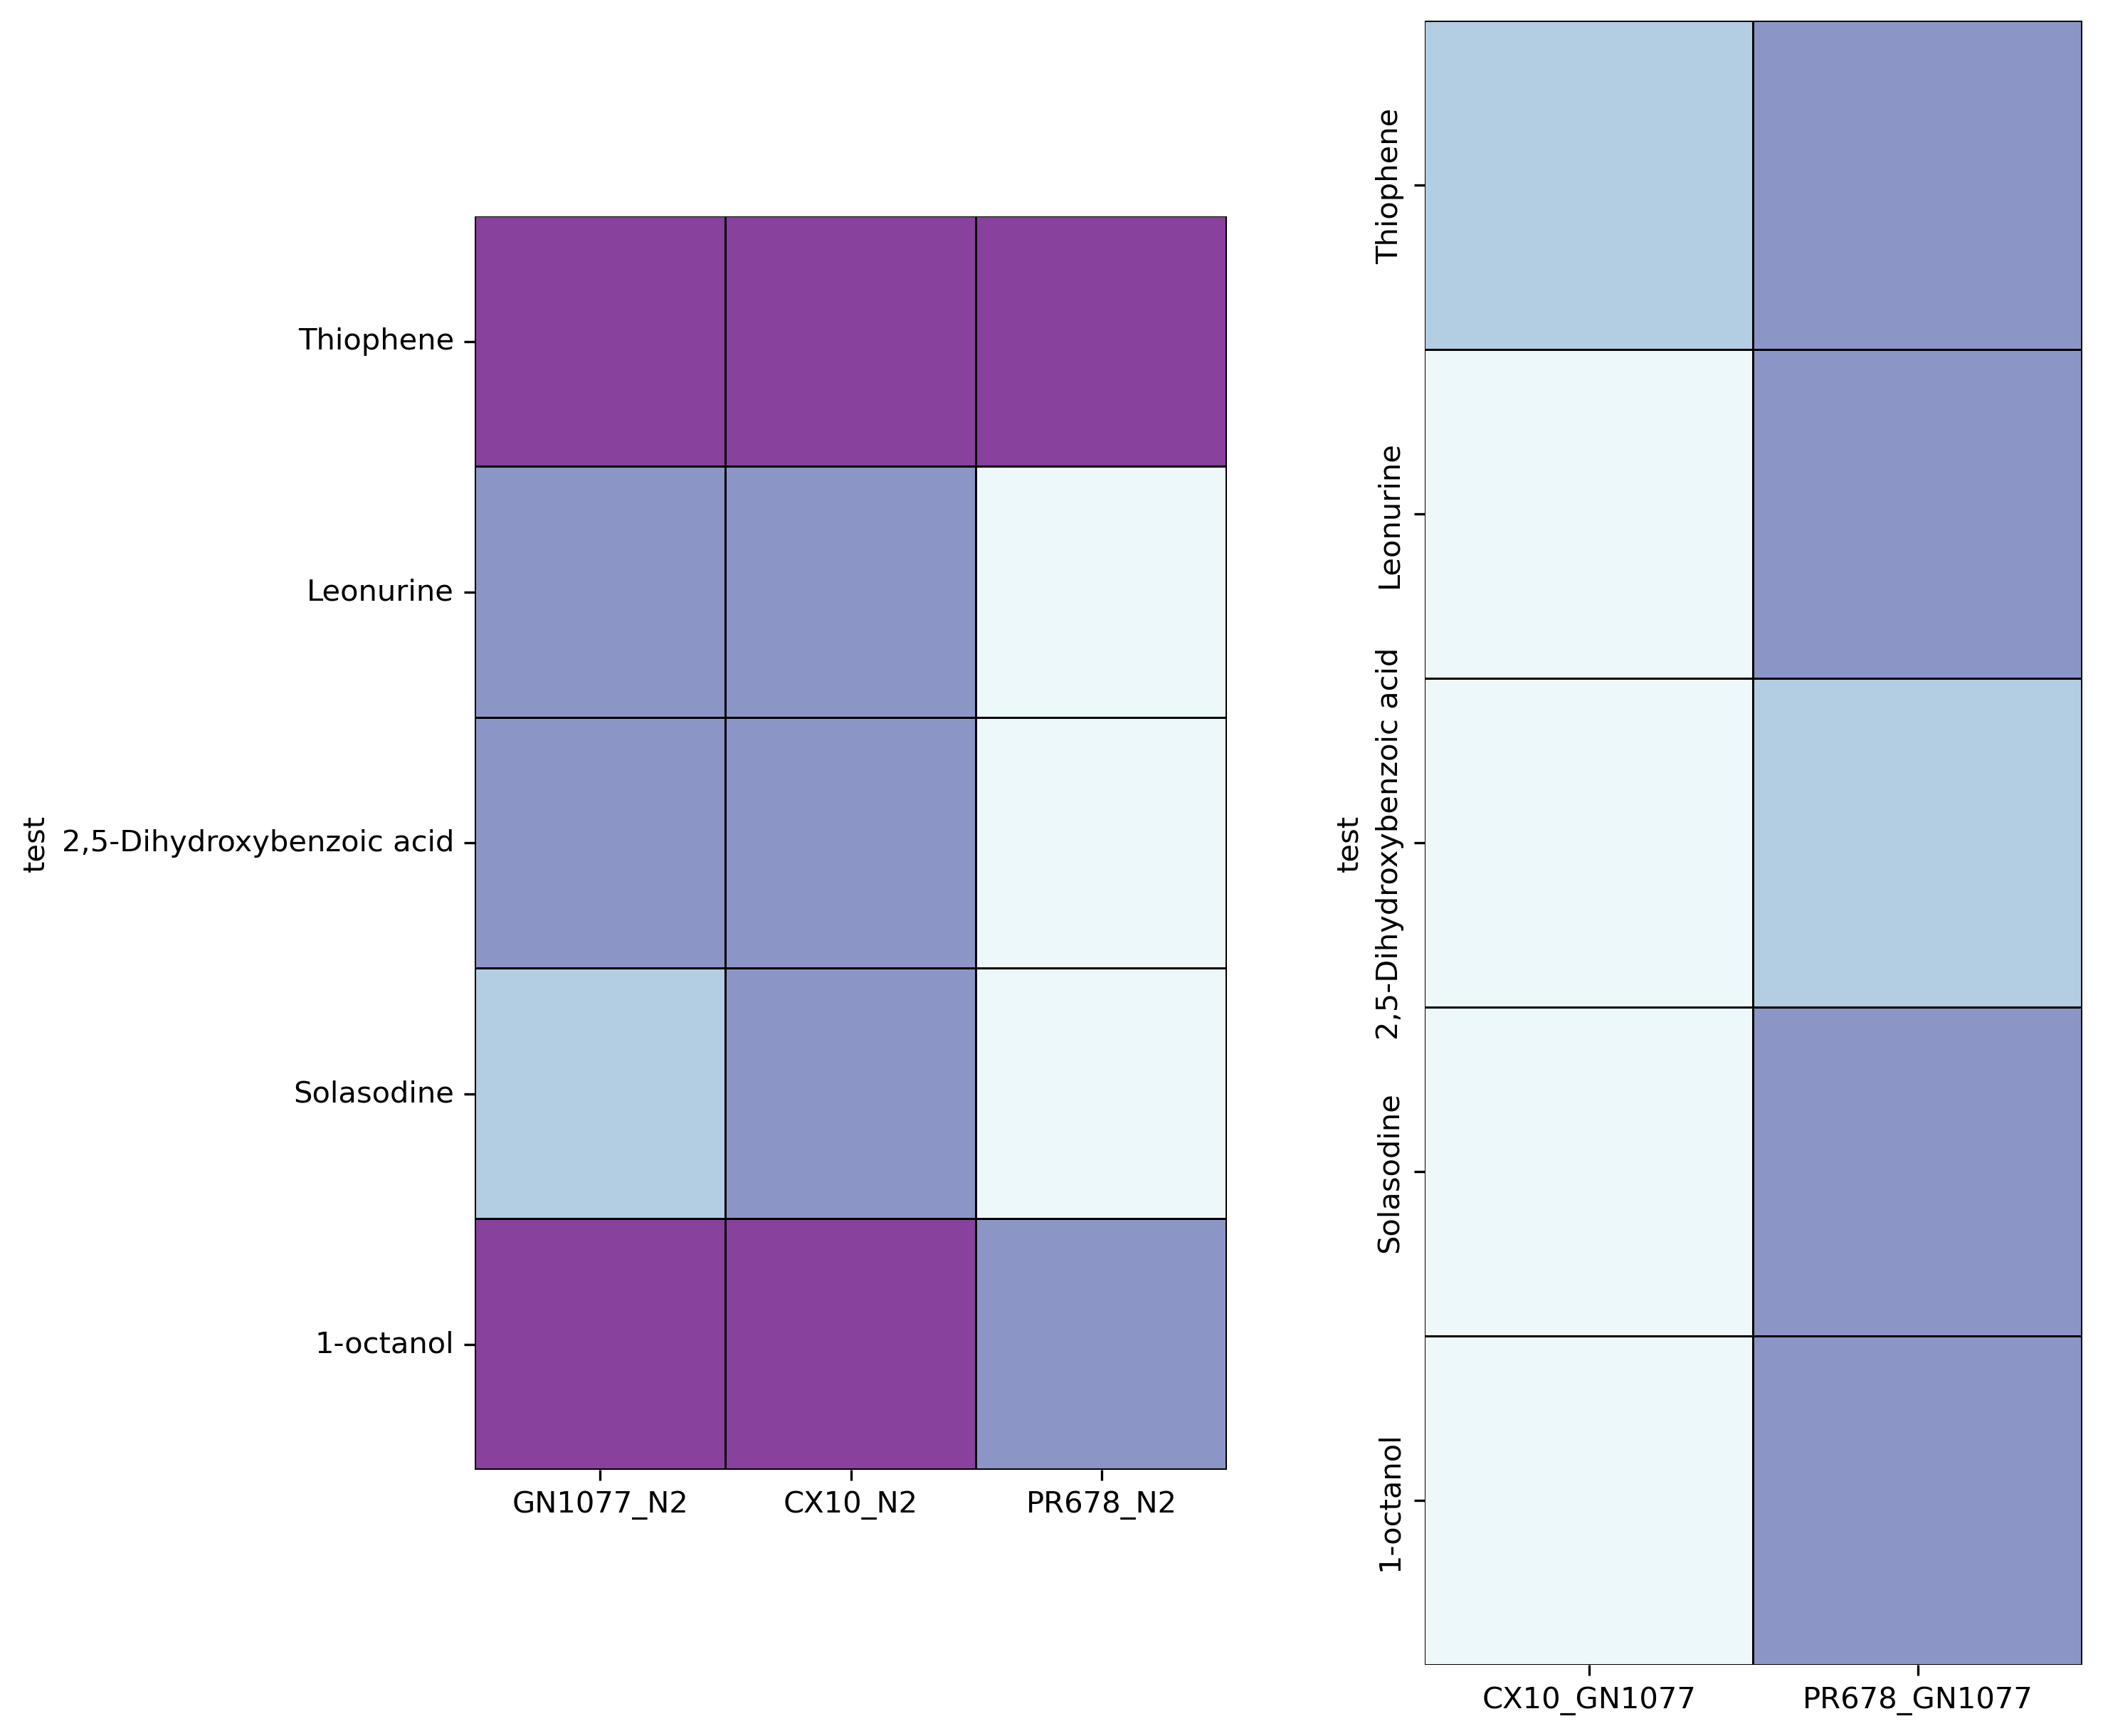

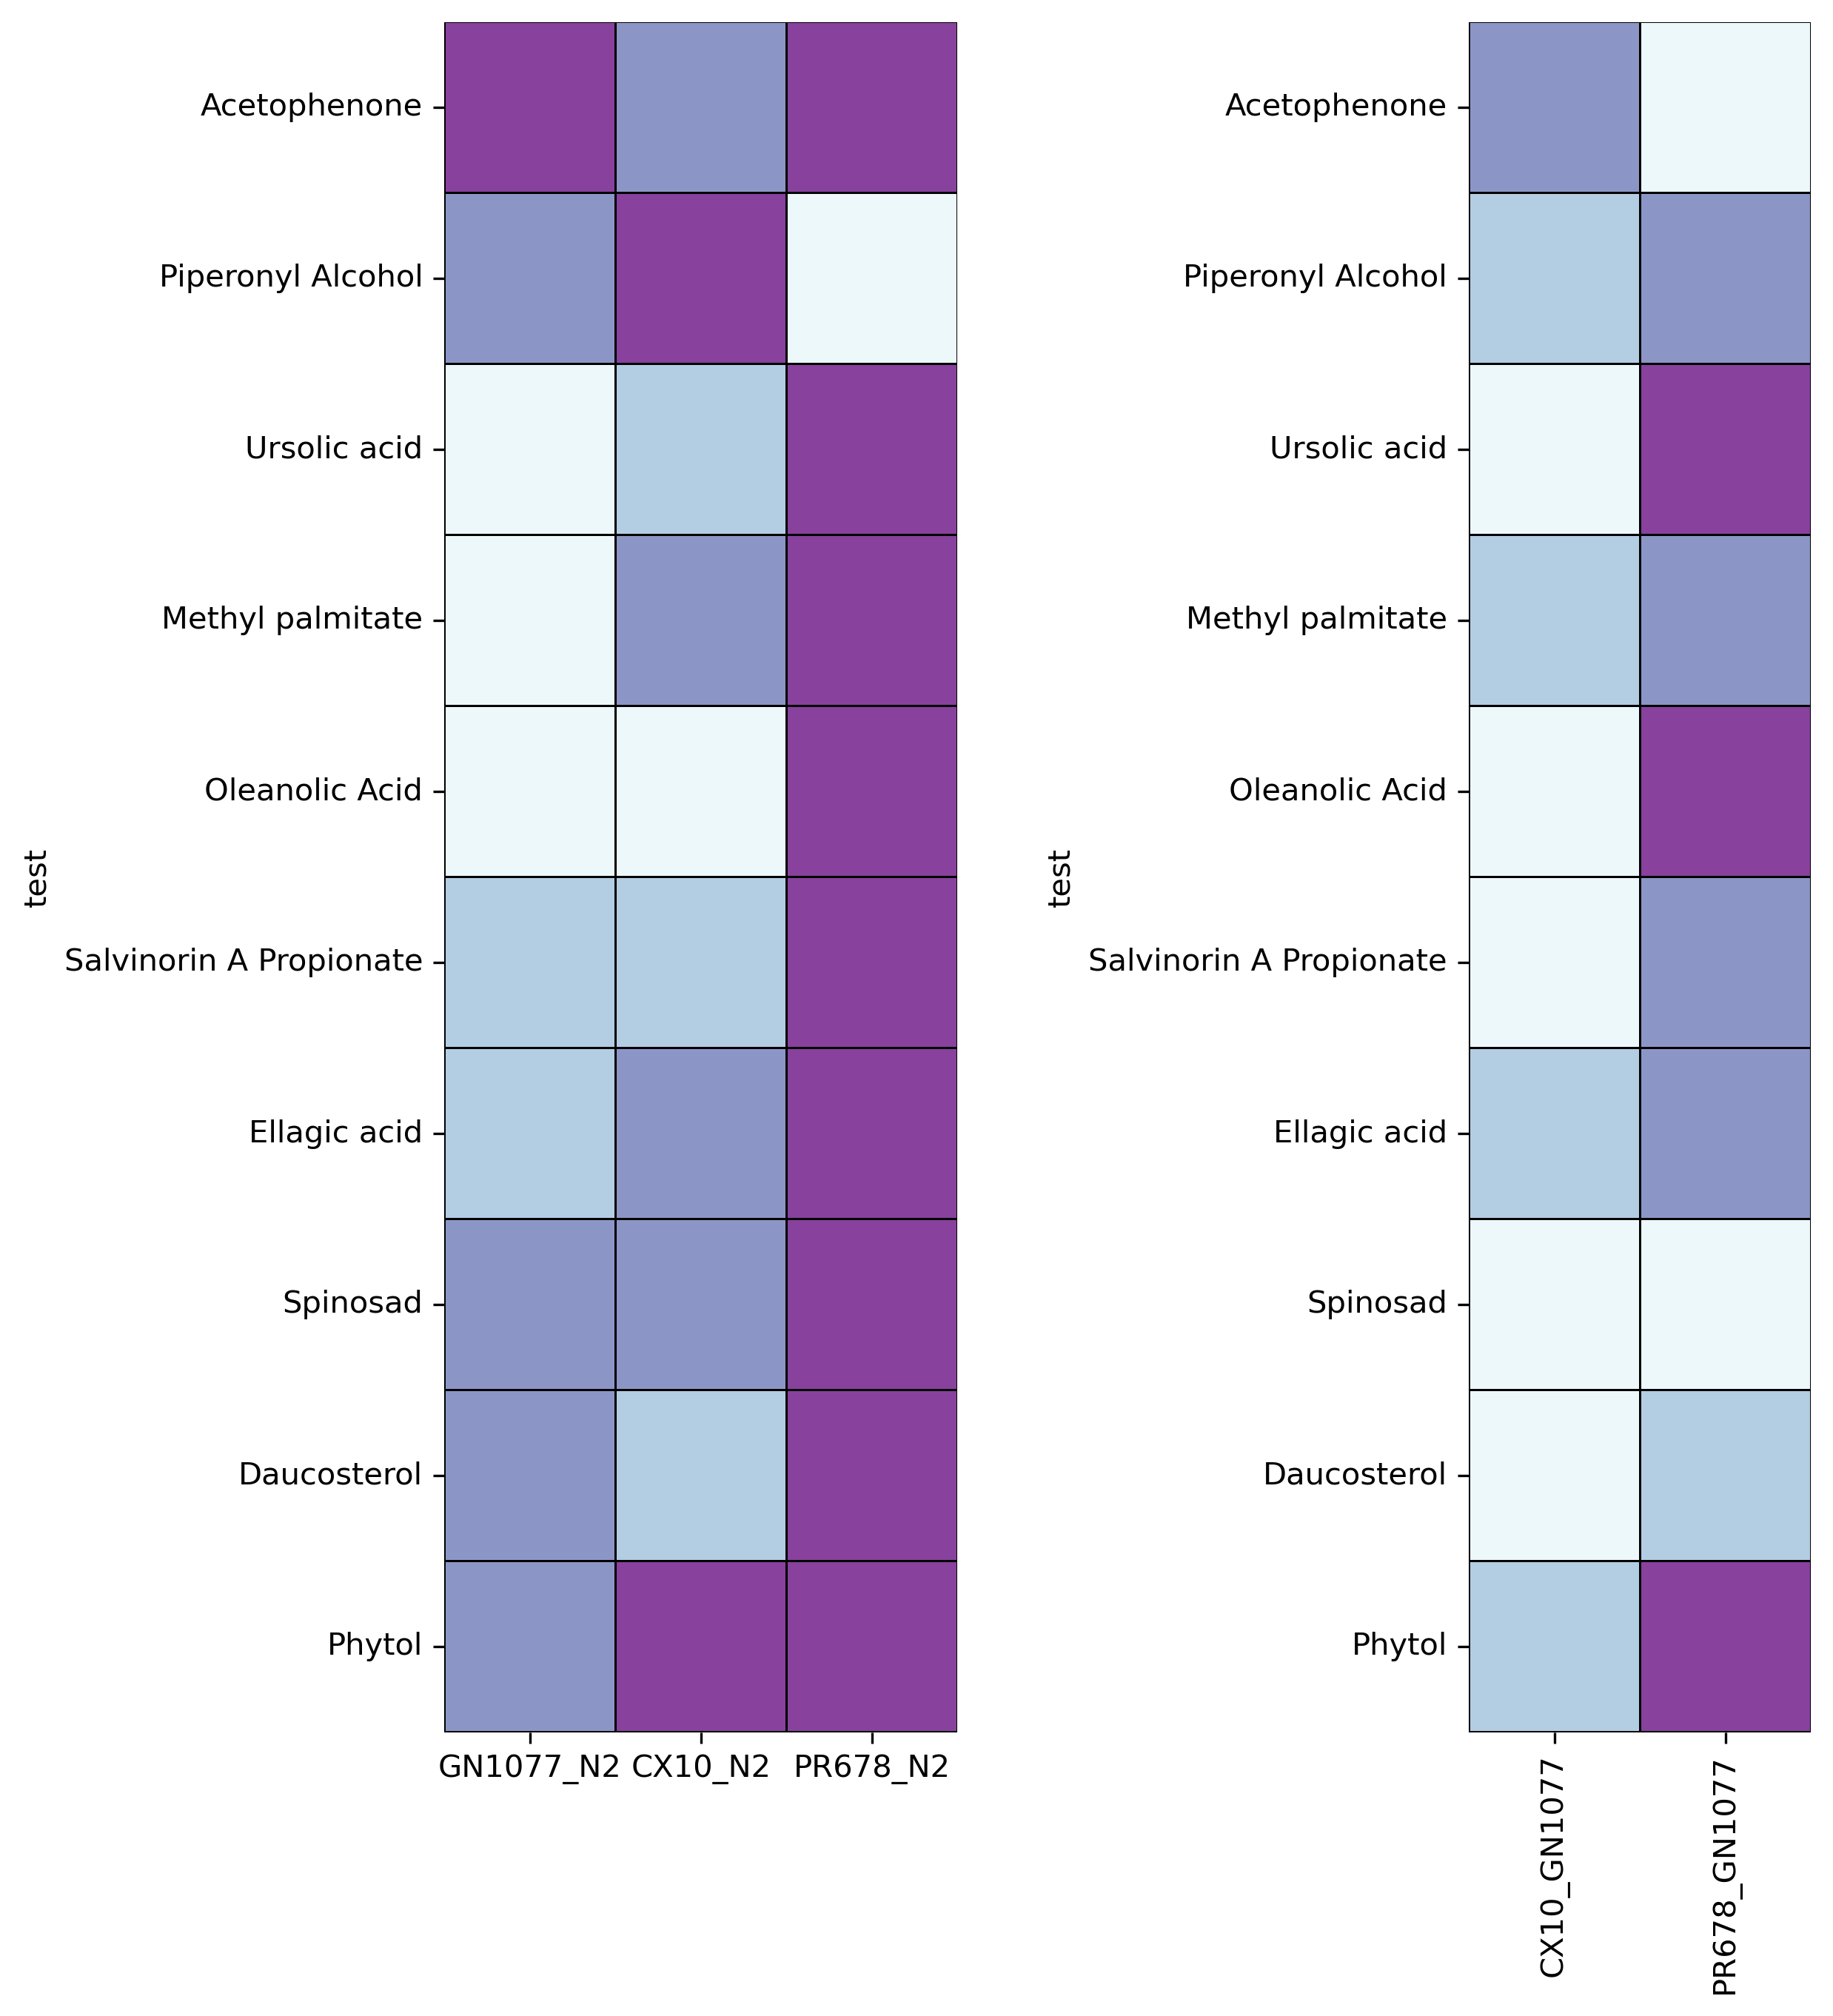

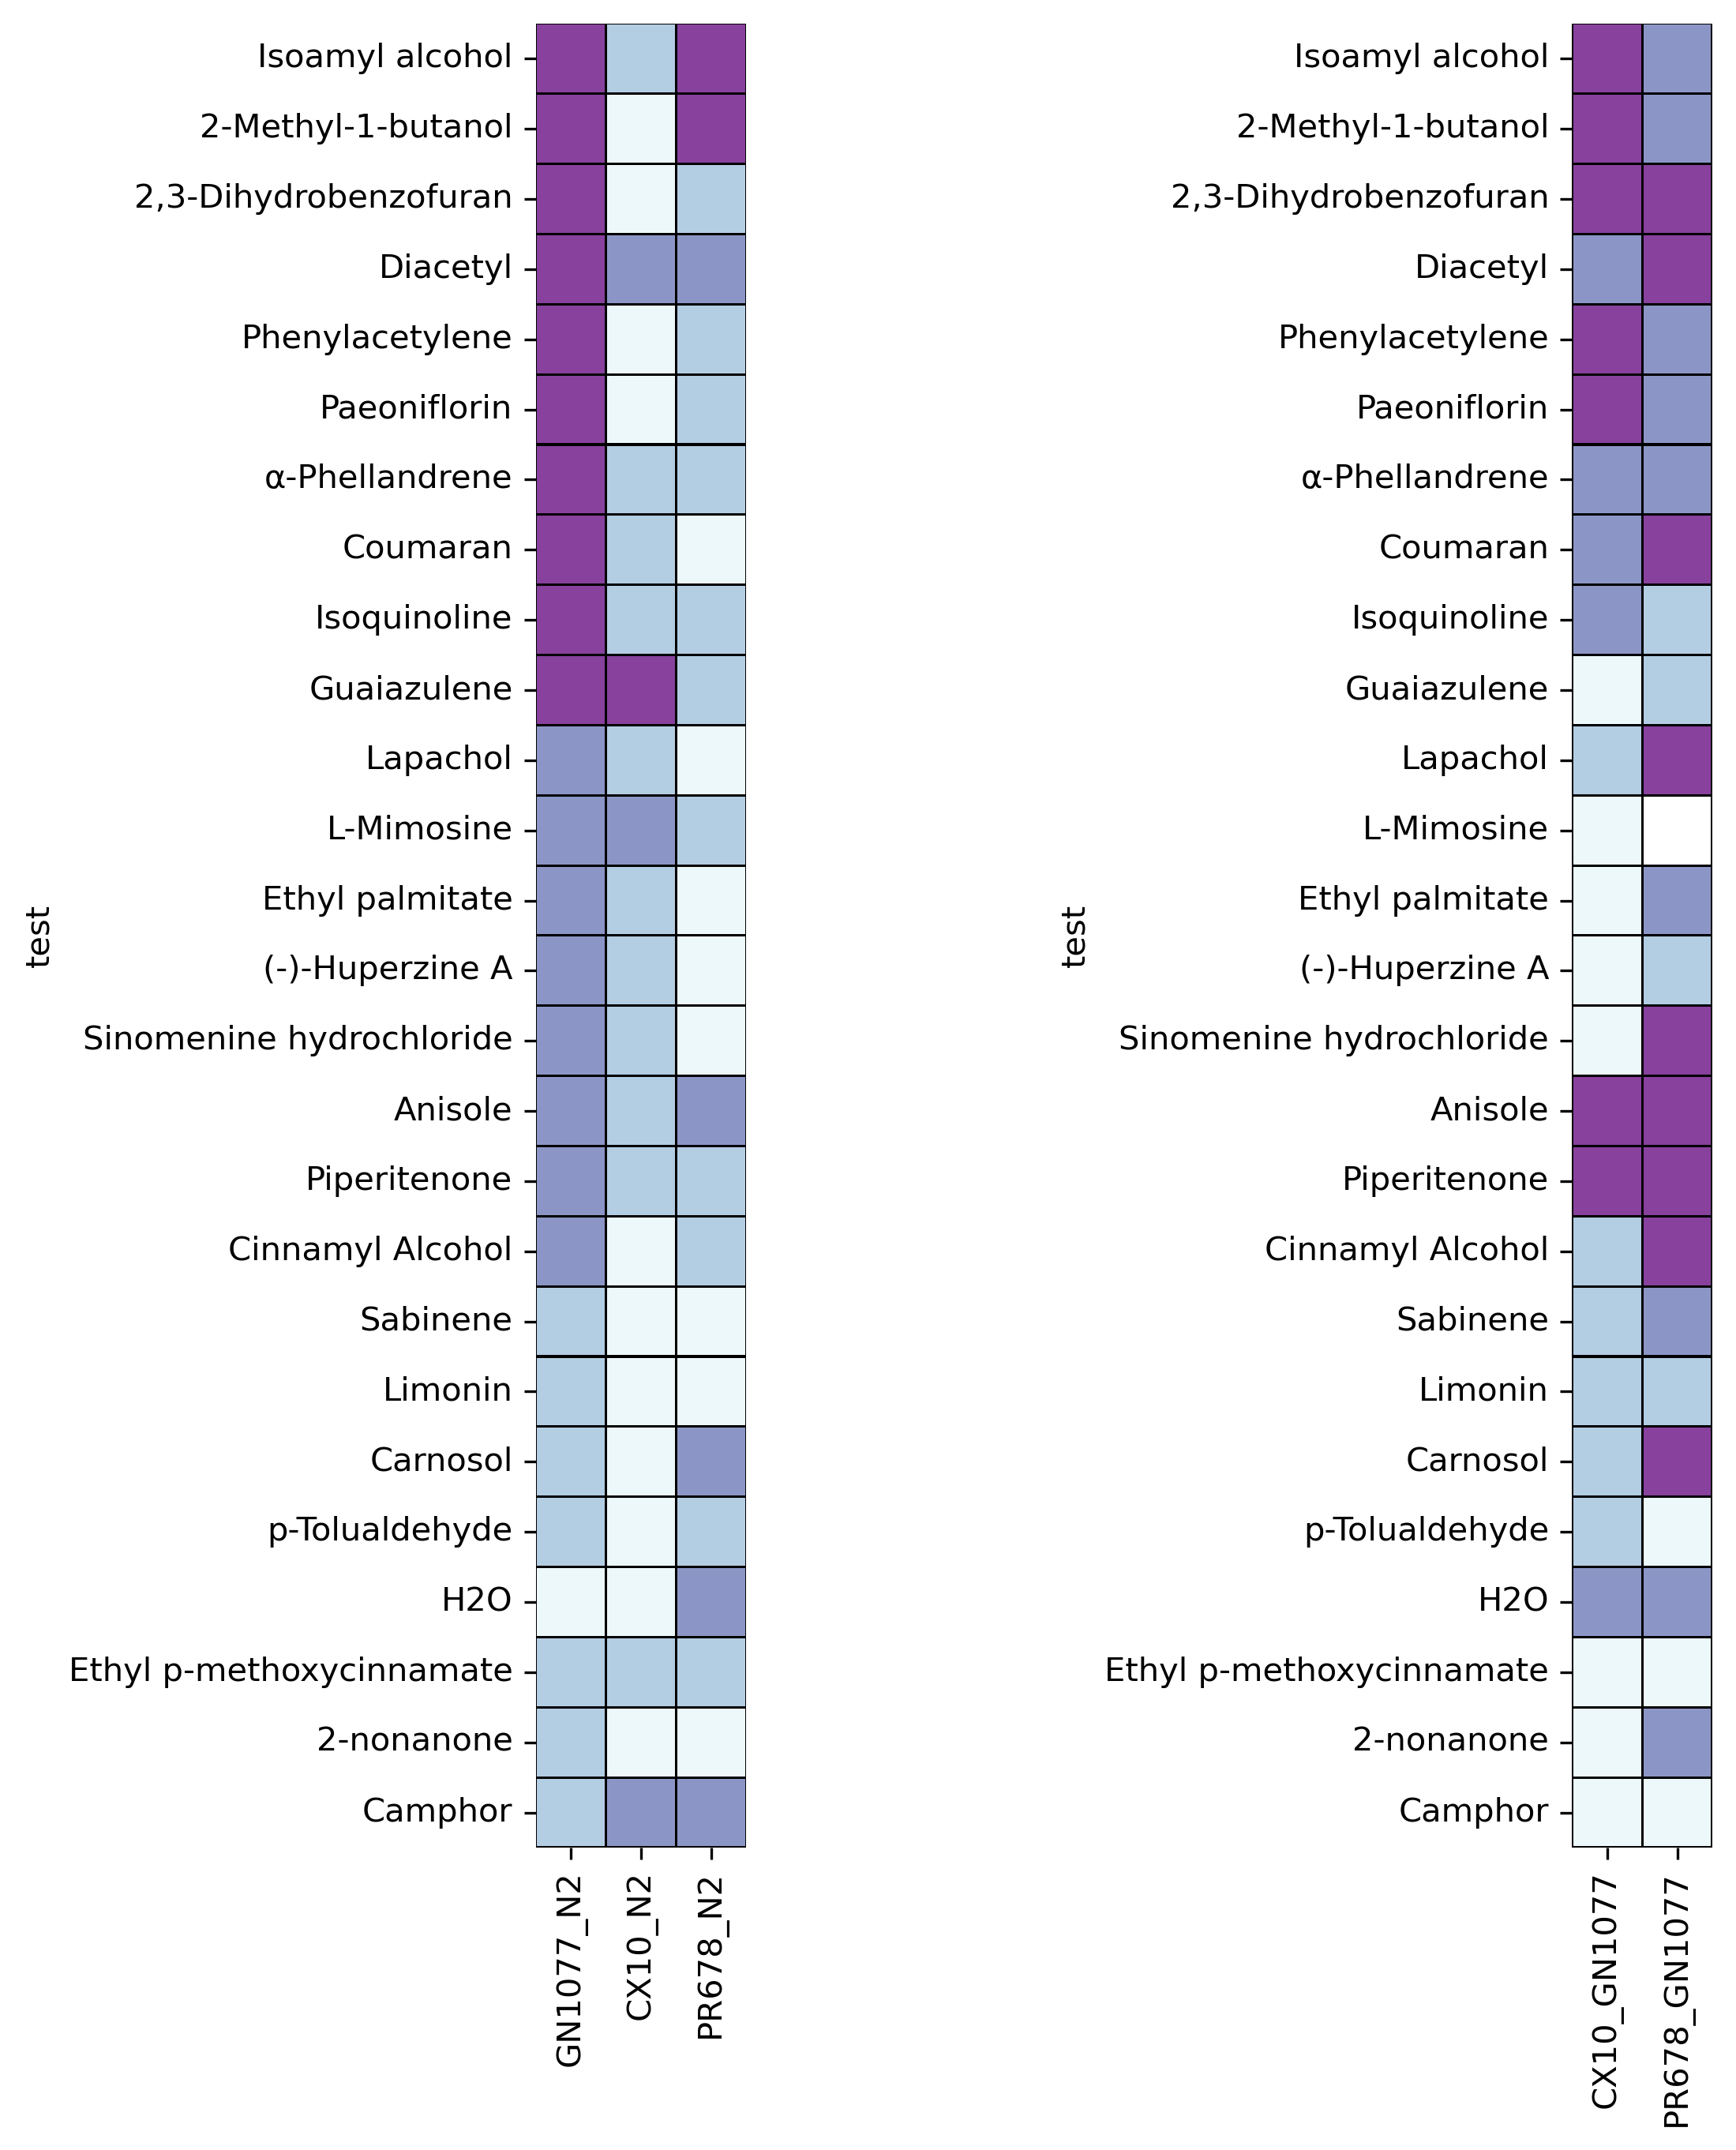

In [296]:
dpi=300
squaresize = 50 # pixels
i=1
for j in cats:
    dn = sn2[sn2['test'].isin(j)]
    dg =sgn[sgn['test'].isin(j)]

    #srt = d.sort_values(by='GN1077_N2')
    dnd = dn.set_index('test')
    dgd = dg.set_index('test')

    f, ax = plt.subplots(ncols=2, figsize=(10,10), dpi=dpi)
    #f.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax[0] = sns.heatmap(dnd, vmax=4, vmin=0, cmap=cmp, square=True, ax=ax[0], cbar=False, linewidths=.5, linecolor='black') 
    ax[1] = sns.heatmap(dgd, vmax=4, vmin=0, cmap=cmp, square=True, ax=ax[1], cbar=False, linewidths=.5, linecolor='black') 
    plt.savefig('/Users/Emily/Desktop/ReviewerResponses/hmap_cats_qts' + str(i) + '.svg', dpi=dpi, bbox_inches="tight")
    
    i= i + 1
plt.show()

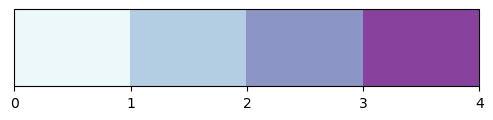

In [212]:
fig, ax = plt.subplots(figsize=(6, 1))

cmap = ListedColormap(['#edf8fb', '#b3cde3', '#8c96c6', '#88419d'])
bounds = [0, 1, 2, 3, 4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             )
plt.savefig('/Users/Emily/Desktop/ReviewerResponses/cmap.svg')

In [299]:
14.9096*26

387.64959999999996